# Hackathon

Alexandros Pappas <br>
Aron Pap 

## Function definitions

In [1]:
# Import libraries
# Module imports
%matplotlib inline
import matplotlib.pylab as plt

from utils.helper_functions import *

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import math
import copy
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR



# Some base models
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection  import ParameterGrid
from sklearn import preprocessing
from sklearn.cluster import KMeans
import xgboost as xgb

import mlens
from mlens.visualization import corrmat
from mlens.ensemble import SuperLearner, BlendEnsemble, Subsemble, SequentialEnsemble

import pickle


# set seed
SEED=3642
np.random.seed(SEED)



from sklearn.metrics import mean_squared_error, r2_score
import fbprophet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.metrics import mean_absolute_error

[MLENS] backend: threading


# Read in and inspect data

In [8]:
def data_reading(path,header=False):
    """Reads in data, prints shape and head as well"""
    dataset = pd.read_csv(path,header)
    print("Shape of the dataset: {}".format(dataset.shape))
    print(dataset.head())
    
    print("Missing values per column")
    print(dataset.isnull().sum())
    
    print(dataset.describe())
    
    return dataset

In [10]:
# Load data
info=pd.read_csv("./Data/sp100-info.csv")
dates=pd.read_csv("./Data/sp100-dates.csv", header=None)
data=pd.read_csv("./Data/sp100-returns.csv", header=None)
Target=['SLB','HAL','USB','WFC']

In [11]:
# Filter dataset for a given store
#dataset = dataset[dataset.Store==1023]

print(info.head())
print(dates.head())
print(data.head())

  Ticker.symbol                   Company             GICS.Sector
0          AMZN            Amazon.com Inc  Consumer Discretionary
1         CMCSA             Comcast Corp.  Consumer Discretionary
2           DIS   The Walt Disney Company  Consumer Discretionary
3             F                Ford Motor  Consumer Discretionary
4          FOXA  Twenty-First Century Fox  Consumer Discretionary
          0
0  20010719
1  20010720
2  20010723
3  20010724
4  20010725
          0         1         2         3         4         5         6   \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   2.928204  0.692683 -0.575605  0.446984 -2.040054 -0.812054  0.944517   
2  -5.757421 -2.894693 -0.445039 -0.945987  2.443118 -2.935893 -2.077843   
3 -28.456778 -2.397047 -2.712644 -1.106651 -1.051364 -1.748678 -2.798236   
4  -4.667797  2.586351  1.184524  1.056614 -2.136482  4.315664  2.678188   

         7         8         9   ...        83        84        85        8

In [12]:
data.columns=info['Ticker.symbol']
data=data[Target]

# Exploratory means
data.apply(np.mean, axis=0)


Ticker.symbol
SLB    0.045477
HAL    0.042940
USB    0.031545
WFC    0.031797
dtype: float64

In [13]:
print(data.head())

Ticker.symbol       SLB       HAL       USB       WFC
0              0.000000  0.000000  0.000000  0.000000
1              4.748801  6.671583 -1.549374 -1.817131
2              0.967041 -0.284091 -0.067912 -0.736200
3             -0.526317 -3.620960 -1.574836 -1.052315
4              5.058944  5.383431  0.756277  0.434648


In [17]:
# Merge with the date
with_dates = data.merge(dates,left_on=None,
                        right_on=None,
                        left_index=True,
                        right_index=True)
with_dates.columns = ['SLB','HAL','USB','WFC','Date']
with_dates.head()


,SLB,HAL,USB,WFC,Date
0,0.000000,0.000000,0.000000,0.000000,20010719
1,4.748801,6.671583,-1.549374,-1.817131,20010720
2,0.967041,-0.284091,-0.067912,-0.736200,20010723
3,-0.526317,-3.620960,-1.574836,-1.052315,20010724
4,5.058944,5.383431,0.756277,0.434648,20010725


In [22]:
# Convert string to datetime
def date_converter(x):
    temp = datetime.strptime(str(x), '%Y%m%d')
    
    return temp

with_dates['Date'] = with_dates['Date'].apply(date_converter)
print(with_dates.head())

        SLB       HAL       USB       WFC       Date
0  0.000000  0.000000  0.000000  0.000000 2001-07-19
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24
4  5.058944  5.383431  0.756277  0.434648 2001-07-25


In [26]:
min(with_dates['Date'])
max(with_dates['Date'])



Timestamp('2013-12-31 00:00:00')

In [ ]:
# Add industry as a feature


# Exploratory Data Analysis

In [23]:
# Explanatory Data Analysis

def plot_time_series(dataset, target_var, date_var, time_period):
    temp = dataset[dataset[date_var]< time_period[1]]
    temp = temp[temp[date_var]> time_period[0]]
    
    plt.figure(figsize=(20,10))
    plt.plot(temp[date_var],temp[target_var])
    plt.show()

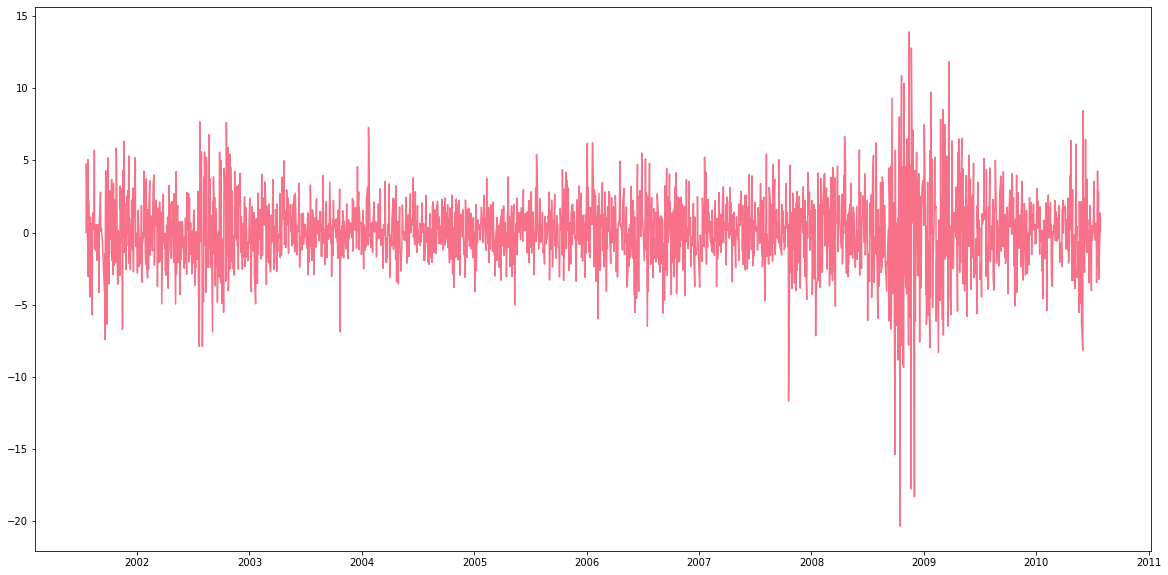

In [24]:
# Test
plot_time_series(with_dates, 'SLB', 'Date', ['2000-07-05','2010-07-30'])

# Data preprocessing

In [44]:
dataset = with_dates.copy()

## Missing data

In [45]:
# Function to handle missing data (separate for after lags as well!)

def missing_data_handle_before_lags(dataframe,threshold):
    """First drops columns with too many observations,
    then imputes mean for missing data if numerical,
    mode if categorical,
    assuming that we do not have missing values for the target, since supervised learning"""
    
    # Check dimensions of the dataset
    print("Dataset shape before dropping columns with too many missing values: {}".format(dataframe.shape))

    # Drop columns with more than 40% missing
    missing_threshold = threshold
    dataframe.dropna(axis=1,inplace=True,thresh=dataframe.shape[0]*(1-missing_threshold))
    print("Dataset shape after dropping columns with too many missing values: {}".format(dataframe.shape))

    Nulls= dataframe.isnull().sum()
    missing_data_col= dataframe.columns[Nulls>0]
    for i in missing_data_col:
        if dataframe[i].dtypes == 'int64' or dataframe[i].dtypes == 'float64':
            dataframe[i].fillna(dataframe[i].mean(),inplace=True)
        else:
            dataframe[i].fillna(dataframe[i].mode()[0],inplace=True)
    
    return dataframe

In [46]:
# Test
dataset = missing_data_handle_before_lags(dataset,0.5)
print(dataset.isnull().sum())

Dataset shape before dropping columns with too many missing values: (3132, 5)
Dataset shape after dropping columns with too many missing values: (3132, 5)
SLB     0
HAL     0
USB     0
WFC     0
Date    0
dtype: int64


In [47]:
def date_sorting(dataset, date_col):
    dataset.sort_values(by=[date_col],ascending=False)
    
    return dataset

In [48]:
# Tests
dataset = date_sorting(dataset, 'Date')
print(dataset.head())

        SLB       HAL       USB       WFC       Date
0  0.000000  0.000000  0.000000  0.000000 2001-07-19
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24
4  5.058944  5.383431  0.756277  0.434648 2001-07-25


## Creating lag features

In [49]:
def lag_creators(num_lags,target_var,dataset):
    
    for i in range(3,num_lags+1):
        temp = 'lag_day_{}_{}'.format(i,target_var)
        dataset[temp] = dataset[target_var].shift(periods = i)
        
    return dataset

In [50]:
dataset = lag_creators(10,'SLB',dataset)
print(dataset.head())

        SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
0  0.000000  0.000000  0.000000  0.000000 2001-07-19            NaN   
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20            NaN   
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23            NaN   
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24       0.000000   
4  5.058944  5.383431  0.756277  0.434648 2001-07-25       4.748801   

   lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  lag_day_8_SLB  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            0.0            NaN            NaN            NaN            NaN   

   lag_day_9_SLB  lag_day_10_SLB  
0            NaN             NaN  
1            NaN      

In [51]:
print(dataset.isnull().sum())

SLB                0
HAL                0
USB                0
WFC                0
Date               0
lag_day_3_SLB      3
lag_day_4_SLB      4
lag_day_5_SLB      5
lag_day_6_SLB      6
lag_day_7_SLB      7
lag_day_8_SLB      8
lag_day_9_SLB      9
lag_day_10_SLB    10
dtype: int64


In [52]:
dataset = lag_creators(10,'HAL',dataset)
print(dataset.head())

        SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
0  0.000000  0.000000  0.000000  0.000000 2001-07-19            NaN   
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20            NaN   
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23            NaN   
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24       0.000000   
4  5.058944  5.383431  0.756277  0.434648 2001-07-25       4.748801   

   lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  ...  \
0            NaN            NaN            NaN            NaN  ...   
1            NaN            NaN            NaN            NaN  ...   
2            NaN            NaN            NaN            NaN  ...   
3            NaN            NaN            NaN            NaN  ...   
4            0.0            NaN            NaN            NaN  ...   

   lag_day_9_SLB  lag_day_10_SLB  lag_day_3_HAL  lag_day_4_HAL  lag_day_5_HAL  \
0            NaN             NaN            NaN            NaN         

In [53]:
dataset = lag_creators(10,'USB',dataset)
print(dataset.head())

        SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
0  0.000000  0.000000  0.000000  0.000000 2001-07-19            NaN   
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20            NaN   
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23            NaN   
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24       0.000000   
4  5.058944  5.383431  0.756277  0.434648 2001-07-25       4.748801   

   lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  ...  \
0            NaN            NaN            NaN            NaN  ...   
1            NaN            NaN            NaN            NaN  ...   
2            NaN            NaN            NaN            NaN  ...   
3            NaN            NaN            NaN            NaN  ...   
4            0.0            NaN            NaN            NaN  ...   

   lag_day_9_HAL  lag_day_10_HAL  lag_day_3_USB  lag_day_4_USB  lag_day_5_USB  \
0            NaN             NaN            NaN            NaN         

In [54]:
dataset = lag_creators(10,'WFC',dataset)
print(dataset.head())

        SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
0  0.000000  0.000000  0.000000  0.000000 2001-07-19            NaN   
1  4.748801  6.671583 -1.549374 -1.817131 2001-07-20            NaN   
2  0.967041 -0.284091 -0.067912 -0.736200 2001-07-23            NaN   
3 -0.526317 -3.620960 -1.574836 -1.052315 2001-07-24       0.000000   
4  5.058944  5.383431  0.756277  0.434648 2001-07-25       4.748801   

   lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  ...  \
0            NaN            NaN            NaN            NaN  ...   
1            NaN            NaN            NaN            NaN  ...   
2            NaN            NaN            NaN            NaN  ...   
3            NaN            NaN            NaN            NaN  ...   
4            0.0            NaN            NaN            NaN  ...   

   lag_day_9_USB  lag_day_10_USB  lag_day_3_WFC  lag_day_4_WFC  lag_day_5_WFC  \
0            NaN             NaN            NaN            NaN         

## Missing data after lags

In [55]:
def missing_data_handler_after_lags(dataset):
    print("Shape of dataset before dropping rows: {}".format(dataset.shape))
    #df.drop(df.tail(n).index,inplace=True)
    dataset = dataset.dropna()
    print("Shape of dataset after dropping rows: {}".format(dataset.shape))
    print(dataset.isnull().sum())
    
    return dataset

In [56]:
# Test
dataset = missing_data_handler_after_lags(dataset)

Shape of dataset before dropping rows: (3132, 37)
Shape of dataset after dropping rows: (3122, 37)
SLB               0
HAL               0
USB               0
WFC               0
Date              0
lag_day_3_SLB     0
lag_day_4_SLB     0
lag_day_5_SLB     0
lag_day_6_SLB     0
lag_day_7_SLB     0
lag_day_8_SLB     0
lag_day_9_SLB     0
lag_day_10_SLB    0
lag_day_3_HAL     0
lag_day_4_HAL     0
lag_day_5_HAL     0
lag_day_6_HAL     0
lag_day_7_HAL     0
lag_day_8_HAL     0
lag_day_9_HAL     0
lag_day_10_HAL    0
lag_day_3_USB     0
lag_day_4_USB     0
lag_day_5_USB     0
lag_day_6_USB     0
lag_day_7_USB     0
lag_day_8_USB     0
lag_day_9_USB     0
lag_day_10_USB    0
lag_day_3_WFC     0
lag_day_4_WFC     0
lag_day_5_WFC     0
lag_day_6_WFC     0
lag_day_7_WFC     0
lag_day_8_WFC     0
lag_day_9_WFC     0
lag_day_10_WFC    0
dtype: int64


## Date features

In [57]:
def date_features(train_df,my_date_column):
    train_df['year'] = pd.to_datetime(train_df[my_date_column]).dt.year
    train_df['quarter'] = pd.to_datetime(train_df[my_date_column]).dt.quarter
    train_df['month'] = pd.to_datetime(train_df[my_date_column]).dt.month
    train_df['week'] = pd.to_datetime(train_df[my_date_column]).dt.week
    #train_df['day_of_year'] = pd.to_datetime(train_df[my_date_column]).dt.dayofyear
    train_df['day_of_month'] = pd.to_datetime(train_df[my_date_column]).dt.day
    
    
    return train_df

In [58]:
# Test
dataset = date_features(dataset,"Date")
print(dataset.head())

         SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
10  1.072396  2.942395  0.064041  0.302939 2001-08-02       0.294551   
11 -2.111015 -0.880466  0.574531  0.000000 2001-08-03      -4.468097   
12  0.588370  0.339559  2.016451 -1.217300 2001-08-06      -2.221326   
13 -1.592028  0.203183  2.403814 -0.061256 2001-08-07       1.072396   
14 -5.707750 -5.421759 -0.060920 -0.491401 2001-08-08      -2.111015   

    lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  ...  \
10       2.258779      -3.056265       5.058944      -0.526317  ...   
11       0.294551       2.258779      -3.056265       5.058944  ...   
12      -4.468097       0.294551       2.258779      -3.056265  ...   
13      -2.221326      -4.468097       0.294551       2.258779  ...   
14       1.072396      -2.221326      -4.468097       0.294551  ...   

    lag_day_6_WFC  lag_day_7_WFC  lag_day_8_WFC  lag_day_9_WFC  \
10       0.434648      -1.052315      -0.736200      -1.817131   
11      

## Creating dummy variables

In [59]:
# Define dummy columns


def dummy_creator(dataset,dummy_cols):
    
    # Generate dummy features for the categorical variables
    df_new = pd.get_dummies(dataset, prefix=dummy_cols,columns = dummy_cols,
                              drop_first = True,prefix_sep = '_dummy_')
    
    #df_new = df_new.drop(columns=dummy_cols)
    
    return df_new

In [60]:
# Test
dummy_cols = ['year','quarter','month','week','day_of_month']
dataset = dummy_creator(dataset,dummy_cols)

print(dataset.head())

         SLB       HAL       USB       WFC       Date  lag_day_3_SLB  \
10  1.072396  2.942395  0.064041  0.302939 2001-08-02       0.294551   
11 -2.111015 -0.880466  0.574531  0.000000 2001-08-03      -4.468097   
12  0.588370  0.339559  2.016451 -1.217300 2001-08-06      -2.221326   
13 -1.592028  0.203183  2.403814 -0.061256 2001-08-07       1.072396   
14 -5.707750 -5.421759 -0.060920 -0.491401 2001-08-08      -2.111015   

    lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  lag_day_7_SLB  ...  \
10       2.258779      -3.056265       5.058944      -0.526317  ...   
11       0.294551       2.258779      -3.056265       5.058944  ...   
12      -4.468097       0.294551       2.258779      -3.056265  ...   
13      -2.221326      -4.468097       0.294551       2.258779  ...   
14       1.072396      -2.221326      -4.468097       0.294551  ...   

    day_of_month_dummy_22  day_of_month_dummy_23  day_of_month_dummy_24  \
10                      0                      0                 

## Drop unncecessary columns

In [61]:
def drop_unwanted_columns(df, drop_cols):
    for column in drop_cols:
        if column in df.columns:
            df.drop([column], axis=1, inplace=True)
            
    return df

In [63]:
# Test
#unnecessary_col_list = ['Store','StateHoliday']

#dataset = drop_unwanted_columns(dataset, unnecessary_col_list)

## Feature scaling

In [21]:
def rescale_df(df, scale_columns,path, scaler=None, pickle_file=True):
    # To avoid scaling the categorical columns, create a dataframe with
    # just the continuous variables
    scale_df = df[scale_columns]
    # This allows the scaler to be recycled for scaling test data
    if scaler is None:
        scaler = preprocessing.StandardScaler().fit(scale_df)
    scale_ndarray = scaler.transform(scale_df)
    df[scale_columns] = scale_ndarray
    if pickle_file:
        temp_path = path+'/scaler.sav'
        pickle.dump(scaler, open(temp_path, 'wb'))
    
    return df, scaler
    

In [22]:
scale_columns = [i for i in dataset.columns if "lag" in i]
scale_columns.append('Customers')

dataset, scaler = rescale_df(dataset, scale_columns,path = './Outputs', scaler=None, pickle_file=True)
dataset.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,lag_day_1_Sales,lag_day_2_Sales,lag_day_3_Sales,lag_day_4_Sales,...,day_of_month_dummy_26,day_of_month_dummy_27,day_of_month_dummy_28,day_of_month_dummy_29,day_of_month_dummy_30,day_of_month_dummy_31,StateHoliday_dummy_0,StateHoliday_dummy_a,StateHoliday_dummy_b,StateHoliday_dummy_c
count,938.000000,938.000000,9.380000e+02,938.000000,938.000000,938.000000,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02,...,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,4.000000,5100.578891,-1.621541e-16,0.828358,0.383795,0.181237,9.572049e-17,6.595648e-17,-2.062361e-16,1.133895e-16,...,0.033049,0.033049,0.033049,0.029851,0.029851,0.019190,0.831557,0.021322,0.006397,0.004264
std,2.001067,2858.140287,1.000533e+00,0.377270,0.486568,0.385420,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00,...,0.178860,0.178860,0.178860,0.170266,0.170266,0.137265,0.374459,0.144532,0.079765,0.065198
min,1.000000,0.000000,-1.932746e+00,0.000000,0.000000,0.000000,-1.785226e+00,-1.784799e+00,-1.784493e+00,-1.779284e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4192.500000,-1.658095e-01,1.000000,0.000000,0.000000,-3.171653e-01,-3.165994e-01,-3.162155e-01,-3.150564e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,5436.500000,2.164560e-01,1.000000,0.000000,0.000000,1.166873e-01,1.162436e-01,1.164753e-01,1.187046e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,6613.000000,5.293028e-01,1.000000,1.000000,0.000000,5.292675e-01,5.299134e-01,5.303421e-01,5.319227e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.000000,15835.000000,3.624450e+00,1.000000,1.000000,1.000000,3.759614e+00,3.760565e+00,3.761164e+00,3.757681e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Potential target transform

In [23]:
def target_log_transform(dataset,target_var):
    colname = "transformed_{}".format(target_var)
    dataset[colname] = np.log(dataset[target_var])
    # log of target etc
    
    return dataset

In [24]:
# Tests
dataset = target_log_transform(dataset,'Sales')
print(dataset.head())

      DayOfWeek        Date  Sales  Customers  Open  Promo  SchoolHoliday  \
1022          5  2015-07-31   7182   0.470066     1      1              1   
2137          4  2015-07-30   6348   0.299758     1      1              1   
3252          3  2015-07-29   6010   0.081321     1      1              1   
4367          2  2015-07-28   6470   0.244223     1      1              1   
5482          1  2015-07-27   8230   0.662587     1      1              1   

      lag_day_1_Sales  lag_day_2_Sales  lag_day_3_Sales  ...  \
1022         0.437612         0.319883         0.481399  ...   
2137         0.319257         0.480973         1.097778  ...   
3252         0.480332         1.097319        -1.784493  ...   
4367         1.096620        -1.784799         0.000904  ...   
5482        -1.785226         0.000504        -0.196617  ...   

      day_of_month_dummy_27  day_of_month_dummy_28  day_of_month_dummy_29  \
1022                      0                      0                      0  

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



## Data type transform if needed

In [64]:
dataset.dtypes

SLB                             float64
HAL                             float64
USB                             float64
WFC                             float64
Date                     datetime64[ns]
                              ...      
day_of_month_dummy_27             uint8
day_of_month_dummy_28             uint8
day_of_month_dummy_29             uint8
day_of_month_dummy_30             uint8
day_of_month_dummy_31             uint8
Length: 145, dtype: object

In [65]:
def dtype_transform(dataset,col_list):
    for i in col_list:
        dataset[i] = dataset[i].astype('int32')
        
    return dataset
    

In [27]:
# Test
#X = dtype_transform(X,['StateHoliday'])

## Save preprocessed dataset (final modelling table)

In [66]:
def save_out_final_dataset(dataset,path):
    dataset.to_csv(path)
    

In [67]:
# Tests
save_out_final_dataset(dataset,'./Outputs/preprocessed_dataset.csv')

## Read in preprocessed dataset (final modelling table)

In [73]:
# Tests
dataset = pd.read_csv('./Outputs/preprocessed_dataset.csv')
# Tests
dataset = dataset.sort_values('Date')
print(dataset.head())


   Unnamed: 0       SLB       HAL       USB       WFC        Date  \
0          10  1.072396  2.942395  0.064041  0.302939  2001-08-02   
1          11 -2.111015 -0.880466  0.574531  0.000000  2001-08-03   
2          12  0.588370  0.339559  2.016451 -1.217300  2001-08-06   
3          13 -1.592028  0.203183  2.403814 -0.061256  2001-08-07   
4          14 -5.707750 -5.421759 -0.060920 -0.491401  2001-08-08   

   lag_day_3_SLB  lag_day_4_SLB  lag_day_5_SLB  lag_day_6_SLB  ...  \
0       0.294551       2.258779      -3.056265       5.058944  ...   
1      -4.468097       0.294551       2.258779      -3.056265  ...   
2      -2.221326      -4.468097       0.294551       2.258779  ...   
3       1.072396      -2.221326      -4.468097       0.294551  ...   
4      -2.111015       1.072396      -2.221326      -4.468097  ...   

   day_of_month_dummy_22  day_of_month_dummy_23  day_of_month_dummy_24  \
0                      0                      0                      0   
1               

## Sorting based on date

## Drop unnecessary columns again

In [33]:
# Drop unecessary cols
unnecessary_col_list = ['Unnamed: 0','Date','transformed_Sales']

dataset = drop_unwanted_columns(dataset, unnecessary_col_list)

## Feature-target split

In [34]:
def X_y_split(dataset, target_var):
    
    X = dataset.drop(columns = target_var)
    y = dataset[target_var]
    
    return X,y

In [35]:
# Tests
X,y = X_y_split(dataset, 'Sales')

## Sequential Train-validation split

In [36]:
# Function to create sequantial train-test split

def ts_split(X, y, valid_prop=0.1, sample_prop=None):
    """Function that does splits the data into validation and train
       assuming the most recent points are the validation set.
       Function will also sample the train set."""
    valid_num = int(X.shape[0]*valid_prop)
    X_valid = X[:valid_num]
    y_valid = y[:valid_num]
    train_num = y.shape[0] - valid_num
    if sample_prop is not None:
        train_num = int(train_num * sample_prop)
    X_train = X[valid_num:train_num + valid_num]
    y_train = y[valid_num:train_num + valid_num]
    
    return X_train, y_train, X_valid, y_valid

In [37]:
X_train, y_train, X_test, y_test = ts_split(X, y, valid_prop=0.2, sample_prop=None)

# Modelling

## Model definitions

In [38]:
# Define functions to be used
def get_models():
    #Generate a library of simple learners
    xgb1 = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 6,
                                  min_child_weight= 11, missing= -999, n_estimators= 70,
                                  nthread= 1, objective= 'reg:squarederror', reg_lambda= 5,
                                  seed= 1337, silent= 1, subsample= 0.8)
    knn = KNeighborsRegressor(n_neighbors=3)
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=10, max_features=3, random_state=SEED)
    svr = SVR(kernel='linear',epsilon=0.2)

    models = {'xgb': xgb1,
              'knn': knn,
              'random forest': rf,
              'linear': lr,
              'SVM': svr
              }

    return models


def train_predict(model_list,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test):
    #Fit models in list on training set and return preds
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        #P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        #P.iloc[:, i] = m.predict(xtest)[:, 1]
        P.iloc[:, i] = m.predict(xtest)
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    # Score model in test set
    print("Scoring models.")
    mse_scores=[]
    r2_scores=[]
    for m in P.columns:
        score = mean_squared_error(y, P.loc[:, m])
        mse_scores.append(score)
        
        r2_score_temp = r2_score(y, P.loc[:, m])
        r2_scores.append(r2_score_temp)
        
        print("%-26s: %.3f" % (m, score))
    return P.columns,mse_scores, r2_scores

In [39]:
## 

In [40]:
# Tests
# Run base-learner models

models = get_models()
P = train_predict(models,X_train,y_train,X_test,y_test)
my_models,mse_scores,r2_scores = score_models(P, y_test)

xgb... 

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



done
knn... done
random forest... done
linear... done
SVM... done
Done.

Scoring models.
xgb                       : 120892.236
knn                       : 496691.583
random forest             : 1152619.235
linear                    : 103484.932
SVM                       : 3486006.193


In [41]:
# Tests
r2_scores

[0.9811694218955886,
 0.9226336616622066,
 0.8204641821200789,
 0.9838808416241385,
 0.4570080437369304]

## Gridsearch

In [61]:
def gridsearch(model,parameters,X,y,param_string):
    
    # Run gridsearch
    regr = GridSearchCV(model, parameters, n_jobs=3, 
                   cv=5,
                   scoring='neg_mean_squared_error',
                   verbose=2, refit=True)



    # Fit the model
    regr.fit(X, y)
    
    # Check the results of gridsearch
    GridSearch_table_plot(regr,param_string, negative=False, display_all_params=False)
    
    return regr

### XGBOOST

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   22.6s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:   57.7s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 810 out of 810 | elapsed:  2.3min finished
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



best parameters: {'colsample_bytree': 0.7, 'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 70, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 5, 'reg_lambda': 2, 'seed': 1337, 'silent': 1, 'subsample': 0.8}
best score:      -166836.61351 (+/-98881.28069)


,param_colsample_bytree,param_eval_metric,param_learning_rate,param_max_depth,param_min_child_weight,param_missing,param_n_estimators,param_nthread,param_objective,param_reg_alpha,...,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
106,0.7,rmse,0.1,4,11,-999,70,1,reg:squarederror,5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-116366.541812,-135796.375118,-76843.055010,-359132.569309,-146961.659274,-166836.613507,98881.280690,1
103,0.7,rmse,0.1,4,11,-999,70,1,reg:squarederror,2,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-117320.032338,-135787.757297,-76828.499222,-359086.915205,-147412.131329,-167103.778259,98751.867923,2
100,0.7,rmse,0.1,4,11,-999,70,1,reg:squarederror,0.5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-117318.495200,-135752.026763,-76825.856151,-359064.226293,-147719.246904,-167152.482487,98733.859285,3
126,0.7,rmse,0.1,6,11,-999,70,1,reg:squarederror,0.5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-109184.024459,-137640.111064,-83723.970153,-366269.668174,-148535.793661,-168882.372314,101061.229407,4
160,0.7,rmse,0.1,8,11,-999,70,1,reg:squarederror,5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-114909.670832,-142387.303655,-78151.214159,-360376.379188,-150002.966516,-168982.086474,98772.830664,5
132,0.7,rmse,0.1,6,11,-999,70,1,reg:squarederror,5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-106439.993550,-140630.065184,-80645.322208,-371620.785511,-147617.548888,-169198.358368,103856.910362,6
129,0.7,rmse,0.1,6,11,-999,70,1,reg:squarederror,2,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-109060.802768,-134527.083787,-80926.857463,-373129.772037,-150272.346667,-169386.959566,104354.444059,7
159,0.7,rmse,0.1,8,11,-999,70,1,reg:squarederror,5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-109299.440571,-135058.142033,-88352.743972,-368040.443513,-147235.548404,-169409.543587,101198.654930,8
153,0.7,rmse,0.1,8,11,-999,70,1,reg:squarederror,0.5,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-107609.576570,-135985.810776,-86284.088405,-369183.265842,-149522.843960,-169525.995708,102026.984090,9
130,0.7,rmse,0.1,6,11,-999,70,1,reg:squarederror,2,...,0.8,"{'colsample_bytree': 0.7, 'eval_metric': 'rmse...",-114223.319991,-143915.777611,-76109.649671,-363334.413982,-153079.106317,-169944.661816,100177.579889,10


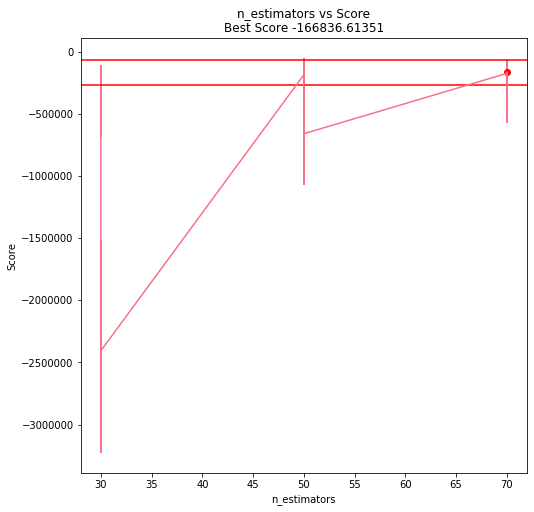

In [49]:
# Tests
# Initialize model
xgb_model_grid = xgb.XGBRegressor()

# Set parameters for gridsearch
parameters = {'nthread':[1], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'eval_metric':['rmse'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [4,6,8],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [30,50,70], #number of trees 
              'missing':[-999],
              'reg_lambda':[0.5,2,5],
              'reg_alpha':[0.5,2,5],
              'seed': [1337]}

xgb_model = gridsearch(xgb_model_grid,parameters,X,y,"n_estimators")

### Random Forest

In [48]:
# Tests
# Initialize model
randomforest_grid = RandomForestRegressor()

# Set parameters for gridsearch
parameters = {'bootstrap':[True,False],
              #'class_weight':[None],
              #'criterion'=['gini',''],
                'max_depth':[30,50,70],
              'max_features':[3, 10, 20],
              'max_leaf_nodes':[None,10,5],
                'min_samples_leaf':[50,100,200],
              'min_samples_split':[2,4,6],
                'n_estimators':[10,50,90],
                'n_jobs':[3],
              'oob_score':[True],
              'random_state':[3642],
                'verbose':[0],
              'warm_start':[False]}

randomforest_model = gridsearch(randomforest_grid,parameters,X,y,"n_estimators")

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   19.6s


KeyboardInterrupt: 

### SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:    4.1s finished
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



best parameters: {'C': 20, 'epsilon': 5, 'kernel': 'linear'}
best score:      -207030.74256 (+/-79379.31264)


,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,20,5,linear,"{'C': 20, 'epsilon': 5, 'kernel': 'linear'}",-1.733870e+05,-2.854694e+05,-1.645764e+05,-3.118452e+05,-9.986318e+04,-2.070307e+05,7.937931e+04,1
8,20,0.5,linear,"{'C': 20, 'epsilon': 0.5, 'kernel': 'linear'}",-1.709583e+05,-2.893526e+05,-1.644840e+05,-3.137176e+05,-9.963696e+04,-2.076319e+05,8.093186e+04,2
4,1,5,linear,"{'C': 1, 'epsilon': 5, 'kernel': 'linear'}",-3.554732e+06,-4.705614e+06,-3.860743e+06,-5.808962e+06,-3.998610e+06,-4.384628e+06,8.048925e+05,3
0,1,0.5,linear,"{'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}",-3.559424e+06,-4.706055e+06,-3.859640e+06,-5.809154e+06,-4.000354e+06,-4.385821e+06,8.040050e+05,4
9,20,0.5,rbf,"{'C': 20, 'epsilon': 0.5, 'kernel': 'rbf'}",-5.875972e+06,-7.601260e+06,-6.312898e+06,-9.206345e+06,-6.448353e+06,-7.087391e+06,1.201589e+06,5
13,20,5,rbf,"{'C': 20, 'epsilon': 5, 'kernel': 'rbf'}",-5.875850e+06,-7.600996e+06,-6.312898e+06,-9.207618e+06,-6.448304e+06,-7.087558e+06,1.202043e+06,6
11,20,0.5,sigmoid,"{'C': 20, 'epsilon': 0.5, 'kernel': 'sigmoid'}",-6.257141e+06,-7.984878e+06,-6.685795e+06,-9.607925e+06,-6.835741e+06,-7.472702e+06,1.209395e+06,7
15,20,5,sigmoid,"{'C': 20, 'epsilon': 5, 'kernel': 'sigmoid'}",-6.262159e+06,-7.984637e+06,-6.691638e+06,-9.608979e+06,-6.836500e+06,-7.475192e+06,1.207895e+06,8
14,20,5,poly,"{'C': 20, 'epsilon': 5, 'kernel': 'poly'}",-6.756481e+06,-8.609747e+06,-7.187051e+06,-1.034069e+07,-7.338467e+06,-8.044796e+06,1.301691e+06,9
10,20,0.5,poly,"{'C': 20, 'epsilon': 0.5, 'kernel': 'poly'}",-6.756612e+06,-8.610611e+06,-7.187099e+06,-1.033948e+07,-7.338905e+06,-8.044851e+06,1.301262e+06,10


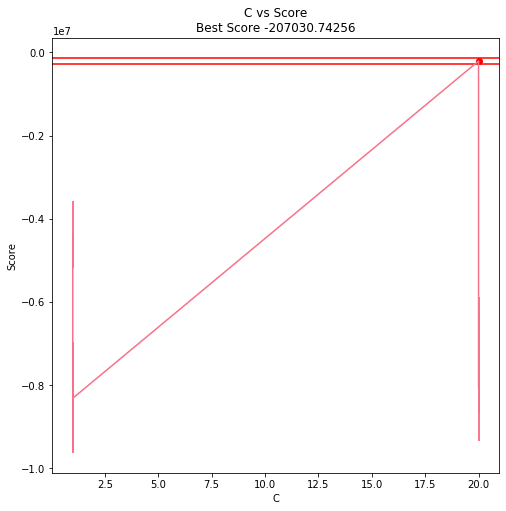

In [62]:
# Inititalize SVR model
SVR_model = SVR()

# Define the grid for searching
svm_params = {'C':[1,20],
               'epsilon':[0.5,5],'kernel':['linear','rbf','poly','sigmoid']}

svm_model = gridsearch(SVR_model,svm_params,X,y,"C")

### K-NN

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


best parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
best score:      -943491.35915 (+/-483404.65547)


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    2.0s finished
/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",-473338.625545,-1.132562e+06,-597974.043888,-1.804152e+06,-7.127807e+05,-9.434914e+05,483404.655470,1
14,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",-495194.074043,-1.206967e+06,-644132.758511,-1.986768e+06,-7.493899e+05,-1.015741e+06,539847.019733,2
3,manhattan,5,distance,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",-624527.924789,-1.157120e+06,-602562.310700,-1.975321e+06,-7.897311e+05,-1.029101e+06,512320.012695,3
17,minkowski,10,distance,"{'metric': 'minkowski', 'n_neighbors': 10, 'we...",-595868.763835,-1.216093e+06,-650440.445646,-1.995801e+06,-7.646363e+05,-1.043852e+06,522871.186192,4
2,manhattan,5,uniform,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",-668243.084255,-1.263865e+06,-643544.358085,-2.175369e+06,-8.412619e+05,-1.117625e+06,572785.125713,5
5,manhattan,10,distance,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",-739850.797067,-1.343849e+06,-679658.753841,-2.043521e+06,-8.308166e+05,-1.126879e+06,514322.323667,6
16,minkowski,10,uniform,"{'metric': 'minkowski', 'n_neighbors': 10, 'we...",-643036.061064,-1.310509e+06,-703345.286755,-2.170257e+06,-8.153978e+05,-1.127732e+06,570967.904301,7
4,manhattan,10,uniform,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",-831178.716277,-1.516834e+06,-763289.394415,-2.240433e+06,-9.161043e+05,-1.252876e+06,560970.380055,8
19,minkowski,20,distance,"{'metric': 'minkowski', 'n_neighbors': 20, 'we...",-663807.636063,-1.532711e+06,-814290.366562,-2.420623e+06,-9.244826e+05,-1.270327e+06,645635.933321,9
12,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",-824136.670213,-1.962827e+06,-673001.484043,-1.971715e+06,-1.040682e+06,-1.294021e+06,561743.922445,10


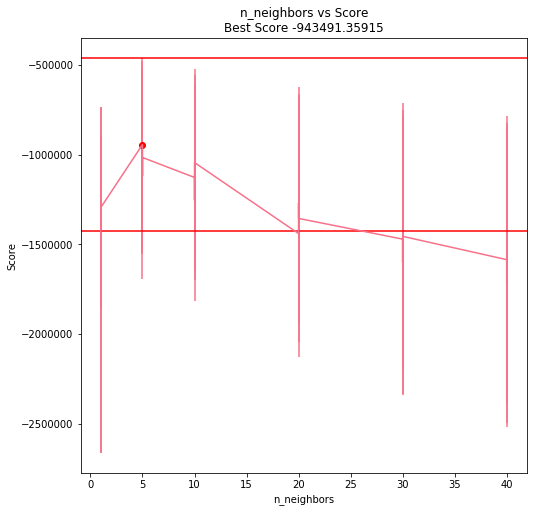

In [63]:
# Initialize K-NN model 
MyKNN = KNeighborsRegressor(algorithm='auto')

# Define grid values for the parameters
knn_grid_values = {'n_neighbors':[1, 5, 10,20,30,40],'weights':['uniform','distance'],
               'metric':['manhattan','minkowski']}

knn_model = gridsearch(MyKNN,knn_grid_values,X,y,"n_neighbors")

## Ensembles

In [64]:
def ensembles(X_train, y_train,X_test, y_test,propagation_bool,prop_features,SEED):
    # Building ensemble model
    #meta_learner3 = GradientBoostingRegressor(
    meta_learner3 = RandomForestRegressor(
        n_estimators=70,
        #bootstrap=True,
        max_features=0.7,
        random_state=SEED)


    # Select features to propagate
    if propagation_bool:
        to_propagate2=prop_features # you can add the most important according to random forest, for example
        pointer2= [i for i,x in enumerate(X_train.columns) if x in to_propagate2]
        print(X_train.columns[pointer2])

    s3 = SuperLearner(
        folds=5,
        random_state=SEED,
        verbose=2,
        backend="multiprocessing",
        n_jobs=3
    )

    # Add the base learners and the meta learner
    s3.add(list(models.values()))
    s3.add_meta(meta_learner3)

    # Train the ensemble
    s3.fit(X_train, y_train)
    
    
    # Predict the test set
    p_s3 = s3.predict(X_test)
    #print(p_s3)
    score_r2=r2_score(y_test, p_s3)
    print("\nSuper Learner R^2 score: %.3f" % score_r2)

    score_mse=mean_squared_error(y_test, p_s3)
    print("\nSuper Learner MSE score: %.3f" % score_mse)
    
    return s3

In [65]:
ensemble_model = ensembles(X_train, y_train,
                           X_test, y_test,propagation_bool=True,
                           prop_features=['Customers','Open'],SEED=42)

Index(['Customers', 'Open'], dtype='object')

Fitting 2 layers
Processing layer-1             

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:03

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Super Learner R^2 score: 0.983

Super Learner MSE score: 110672.729


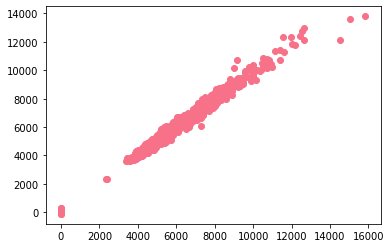

In [66]:
# Compare predictions vs true values
y_pred_train = regr_model.predict(X)

# Plot actual vs predicted
plt.scatter(y,y_pred_train)
plt.show()

### Feature importance

In [67]:
def feature_importance(X,y,gridsearch_cv_model):
    
    # Refit model with the best parameters
    model = gridsearch_cv_model.best_estimator_

    # Fit the model
    model.fit(X, y)

    feature_names = X.columns
    importance = model.feature_importances_
    important_features = pd.Series(data=importance/importance.max() ,index=feature_names)
    important_features = important_features.sort_values(ascending=False)
    
    # Visualize importance

    plt.figure(figsize=(25,5))
    plt.bar(range(10), height = important_features[0:10])
    plt.xticks(ticks = np.arange(0, 10,1),labels = important_features.index[0:10])
    plt.title("Relative importance of the 10 most important feature")
    plt.show()
    
    return model

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



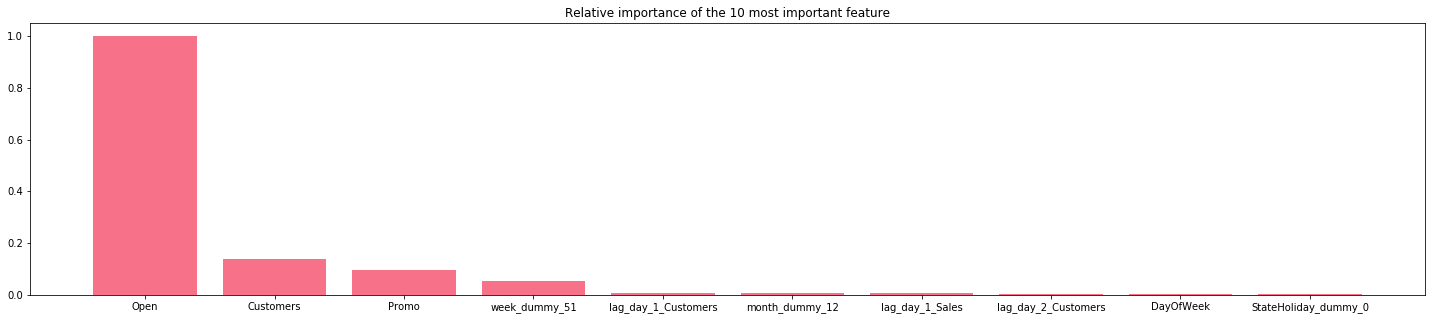

In [68]:
# Tests
final_model = feature_importance(X,y,regr_model)

In [71]:
# Dump/Pickle
def dump_objects(path,object_to_pickle):
    filename = path
    pickle.dump(object_to_pickle, open(filename, 'wb'))

In [72]:
# Tests
dump_objects('./Outputs/final_model.sav',final_model)

In [73]:
dump_objects('./Outputs/final_model_columns.sav',X.columns)

In [74]:
dump_objects('./Outputs/ensemble_model.sav',ensemble_model)

In [75]:
dump_objects('./Outputs/single_model.sav',regr_model)

Shape of the dataset: (41088, 8)
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
Missing values per column
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
                 Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.

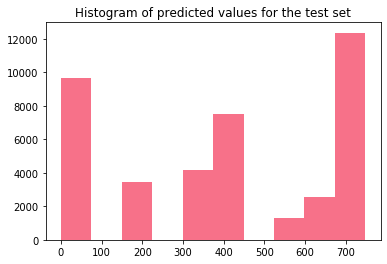

         Date Predicted_value
0  2015-09-17           722.2
1  2015-09-17           722.2
2  2015-09-17           722.2
3  2015-09-17           722.2
4  2015-09-17           722.2


In [77]:
# Read-in test data
test = data_reading('./Data/test.csv')

# Save the dates from the test set for the submission files
dates = test['Date']
# Handle missing values before lags
test = missing_data_handle_before_lags(test,0.5)
#print(test.isnull().sum())

# Generate lags
#test = lag_creators(4,'Sales',test)
#test = lag_creators(4,'Customers',test)


# Handle missing data after lags
test = missing_data_handler_after_lags(test)

# Test
test = date_features(test,"Date")
#print(test.head())

# Test
dummy_cols = ['year','quarter','month','week','day_of_month','StateHoliday']
test = dummy_creator(test,dummy_cols)

#print(dataset.head())

# Drop unnecessary columns
unnecessary_col_list = ['Store','Id']
test = drop_unwanted_columns(test, unnecessary_col_list)

# Scale columns
#scale_columns = [i for i in dataset.columns if "lag" in i]
#scale_columns.append('Customers')

# Import scaler
filename = './Outputs/scaler.sav'
sc = pickle.load(open(filename, 'rb'))

# Import columns from the final model
filename = './Outputs/final_model_columns.sav'
final_model_columns = pickle.load(open(filename, 'rb'))

# Add columns which are missing from validation set, but were in the train set
colnames = test.columns
for i in final_model_columns:
        if i not in colnames:
            test[i]=0
            
# Drop columns which are in the validation set, but not in the train set
for j in colnames:
        if j not in final_model_columns:
            test = test.drop(columns=j)
            
# Rearrange columns
test = test[final_model_columns]

test, scaler = rescale_df(test, scale_columns,path = './Outputs', scaler=sc, pickle_file=False)
print(test.describe())

# Import best ensemble model
filename = './Outputs/ensemble_model.sav'
ensemble_model = pickle.load(open(filename, 'rb'))

# Import best single model
filename = './Outputs/single_model.sav'
single_model = pickle.load(open(filename, 'rb'))

# Import best single model

# Predict results
test_pred = ensemble_model.predict(test)
print(test_pred.shape)
plt.hist(test_pred)
plt.title("Histogram of predicted values for the test set")
plt.show()

# Display some performance metrics
#print("Validation: MSE of the model: {}".format(mean_squared_error(y, y_pred)))

# Get correlation for the validation set
#y = pd.Series(y)
#y_pred = pd.Series(y_pred)
#temp_corr = y.corr(y_pred)

#print("Validation: R^2 of the model: {}".format(temp_corr))

# Generate dataframe for submission
submission = np.array((dates,test_pred))
submission  = pd.DataFrame(submission.T)
submission.columns = ['Date','Predicted_value']
print(submission.head())

# Save out prediction/submission file
save_out_final_dataset(submission,'./Outputs/predictions.csv')



# Prediction

In [78]:
def validation(path):
    test = data_reading(path)

    # Save the dates from the test set for the submission files
    dates = test['Date']
    # Handle missing values before lags
    test = missing_data_handle_before_lags(test,0.5)
    #print(test.isnull().sum())

    # Generate lags
    #test = lag_creators(4,'Sales',test)
    #test = lag_creators(4,'Customers',test)


    # Handle missing data after lags
    test = missing_data_handler_after_lags(test)

    # Test
    test = date_features(test,"Date")
    #print(test.head())

    # Test
    dummy_cols = ['year','quarter','month','week','day_of_month','StateHoliday']
    test = dummy_creator(test,dummy_cols)

    #print(dataset.head())

    # Drop unnecessary columns
    unnecessary_col_list = ['Store','Id']
    test = drop_unwanted_columns(test, unnecessary_col_list)

    # Scale columns
    #scale_columns = [i for i in dataset.columns if "lag" in i]
    #scale_columns.append('Customers')

    # Import scaler
    filename = './Outputs/scaler.sav'
    sc = pickle.load(open(filename, 'rb'))

    # Import columns from the final model
    filename = './Outputs/final_model_columns.sav'
    final_model_columns = pickle.load(open(filename, 'rb'))

    # Add columns which are missing from validation set, but were in the train set
    colnames = test.columns
    for i in final_model_columns:
            if i not in colnames:
                test[i]=0

    # Drop columns which are in the validation set, but not in the train set
    for j in colnames:
            if j not in final_model_columns:
                test = test.drop(columns=j)

    # Rearrange columns
    test = test[final_model_columns]

    test, scaler = rescale_df(test, scale_columns,path = './Outputs', scaler=sc, pickle_file=False)
    print(test.describe())

    # Import best ensemble model
    filename = './Outputs/ensemble_model.sav'
    ensemble_model = pickle.load(open(filename, 'rb'))

    # Import best single model
    filename = './Outputs/single_model.sav'
    single_model = pickle.load(open(filename, 'rb'))

    # Import best single model

    # Predict results
    test_pred = ensemble_model.predict(test)
    print(test_pred.shape)
    plt.hist(test_pred)
    plt.title("Histogram of predicted values for the test set")
    plt.show()

    # Display some performance metrics
    #print("Validation: MSE of the model: {}".format(mean_squared_error(y, y_pred)))

    # Get correlation for the validation set
    #y = pd.Series(y)
    #y_pred = pd.Series(y_pred)
    #temp_corr = y.corr(y_pred)

    #print("Validation: R^2 of the model: {}".format(temp_corr))

    # Generate dataframe for submission
    submission = np.array((dates,test_pred))
    submission  = pd.DataFrame(submission.T)
    submission.columns = ['Date','Predicted_value']
    print(submission.head())

    # Save out prediction/submission file
    save_out_final_dataset(submission,'./Outputs/predictions.csv')

Shape of the dataset: (41088, 8)
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
Missing values per column
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
                 Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.

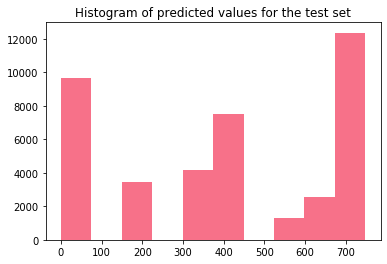

         Date Predicted_value
0  2015-09-17           722.2
1  2015-09-17           722.2
2  2015-09-17           722.2
3  2015-09-17           722.2
4  2015-09-17           722.2


In [86]:
# Test validation function
validation(path='./Data/test.csv')

# Other functions

In [79]:
# 1 Trying out different models on the different computers
# 2 Giving the best models to the Ensemble
# CATEGORY ENCODER?? - https://contrib.scikit-learn.org/categorical-encoding/
# FB Prophet?? from fbprophet import Prophet

In [76]:
# Saving output files

def save_out(model):
    pass

In [69]:
# Function to score model

def scoring_func(metric,time_period,X,y):
    pass

In [18]:
def model_comparison():
    pass

In [20]:
def sampling(X):
    pass

In [56]:
def get_outside_data():
    pass

In [146]:
def check_for_missing_data(df, threshold=0.4, drop_nas=False, drop_columns=False):
    null_list = list()
    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_prop = null_count / len(df[column])
        null_list.append({'name' : column,
                          'null_count' : null_count,
                          'null_prop' : null_prop})
    null_summary = pd.DataFrame(null_list)
    display(null_summary)
    null_summary['null_prop'].plot.bar()
    #plt.show()
    # Drop null values
    if drop_nas:
        df = df.dropna() 
    if drop_columns:
    # Drop columns which have more than <threshold> % nulls
        df = df[null_summary.loc[null_summary['null_prop'] <= threshold]['name']]
    return df

In [6]:
# Seasonal decomposition
def seasonal_decomp(X,y):
    pass

In [ ]:
def lag_opt(X,y):
    # Checks how many columns to use
    pass